Reaction diffusion system simulation: Test version adapted from Ipython Interactive Computing and Visualization Cookbook

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
# discretization
size = 100.0
dx = 2./size
T = 10.0
dt = .9 * dx**2/2   # for stability condition
N = int(T/dt)

In [129]:
dx/size*100

0.02

In [130]:
# second differential using finite differnces
def diffTwo(Z):
    Zcenter = Z[1:-1]
    Zleft = Z[:-2]
    Zright = Z[2:]
    return (Zleft - 2*Zcenter + Zright) / dx**2

Differential equation: Simple 1D diffusion
$$ \frac{\partial u}{\partial t} = D_u \frac{\partial^2 u}{\partial x^2} $$


In [131]:
#u0 = np.arange(size)[::-1]/size   # initialise 1D variable as linear gradient
#u =  u0.copy()
#Du = .01   # diffusion coefficient

def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
u0 = gaussian(np.arange(size)/size, 0.5, 0.1)
u = u0.copy()
Du = 0.008

#u0 = np.zeros(size) # for erfc solution
#u0[0:20] = 1.
#u = u0.copy()
#Du = 0.001

In [132]:
# simulate
for n in range(N):
    u[1:-1] += dt * Du * diffTwo(u)
    # Neumann coditions:
    u[0] = u[1]
    u[-1] = u[-2]

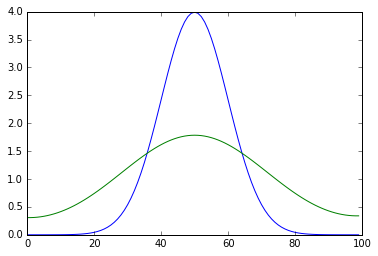

In [133]:
plt.plot(u0);
plt.plot(u);

Differential equation: 2 component reaction diffusion
$$ \frac{\partial a}{\partial t} = D_a \frac{\partial^2 a}{\partial x^2} - \delta_a a$$
$$ \frac{\partial g}{\partial t} = \frac{\alpha_g \cdot a^n}{K_a^n + a^n} - \delta_g g $$
a is the concentration of AHL, g is GFP

In [65]:
#a0 = np.zeros(size, dtype=np.float)
#a0[0:20] = 1.
a0 = gaussian(np.arange(size)/size, 0.5, 0.1)
a = a0.copy()
g0 = np.zeros(size, dtype=np.float)
g = g0.copy()

Da = 0.1
delta_a = 0.01
n = 5.
Ka = 1.
alpha_g = 10.0
delta_g = 0.01

In [66]:
# simulate
for n in range(N):
    #exclude border values
    ac = a[1:-1]
    gc = g[1:-1]
    #DGL
    a[1:-1] += dt * (Da*diffTwo(a) - delta_a*ac)
    g[1:-1] += dt * ((alpha_g * np.power(ac,n))/(np.power(Ka,n) + np.power(ac,n)) - delta_g*gc)
    # Neumann coditions:
    a[0] = a[1]
    a[-1] = a[-2]
    g[0] = g[1]
    g[-1] = g[-2]
    i = n

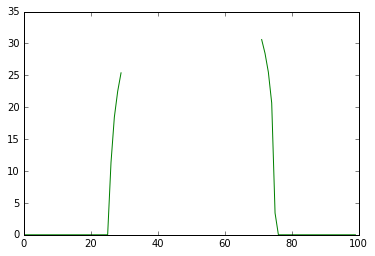

In [69]:
plt.plot(g0)
plt.plot(g)

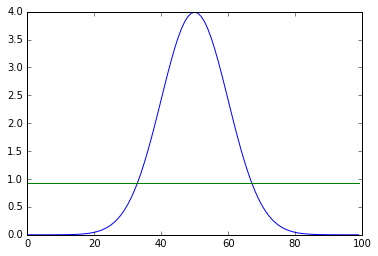

In [63]:
plt.plot(a0)
plt.plot(a)